## Observations and Insights 

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = study_results.merge( mouse_metadata, on="Mouse ID", how='left')

# Display the data table for preview
combined = combined.sort_values(['Mouse ID', 'Timepoint'], ascending=[True, True])
combined = combined.reset_index()
combined = combined.drop(combined.columns[0], axis=1)
print(combined.head(10))

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a203          0           45.000000                 0    Infubinol   
1     a203          5           48.508468                 0    Infubinol   
2     a203         10           51.852437                 1    Infubinol   
3     a203         15           52.777870                 1    Infubinol   
4     a203         20           55.173336                 1    Infubinol   
5     a203         25           56.793208                 1    Infubinol   
6     a203         30           59.523197                 1    Infubinol   
7     a203         35           61.931650                 2    Infubinol   
8     a203         40           63.593490                 2    Infubinol   
9     a203         45           67.973419                 2    Infubinol   

      Sex  Age_months  Weight (g)  
0  Female          20          23  
1  Female          20          23  
2  Female          20          23  
3  Female          

In [111]:
# Checking the number of mice.
number_of_mice = len(pd.unique(mouse_metadata['Mouse ID']))
print(f"The number of mice is : {str(number_of_mice)}")

The number of mice is : 249


In [112]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined['duplicated'] = combined.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
combined_dup = combined[combined['duplicated'] == True]
mice_with_duplicated_info = len(pd.unique(combined_dup['Mouse ID']))
duplicated_mouse_id = pd.unique(combined_dup['Mouse ID'])
print(f"The mouse with duplicated information is: {mice_with_duplicated_info} \
    and the Mouse ID is: {duplicated_mouse_id}")

The mouse with duplicated information is: 1     and the Mouse ID is: ['g989']


In [113]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_dup = combined_dup.drop(['duplicated'], axis=1)
combined_dup = combined_dup.reset_index()
combined_dup = combined_dup.drop(combined_dup.columns[0], axis=1)
print(combined_dup)

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     g989          0           45.000000                 0     Propriva   
1     g989          0           45.000000                 0     Propriva   
2     g989          5           48.786801                 0     Propriva   
3     g989          5           47.570392                 0     Propriva   
4     g989         10           51.745156                 0     Propriva   
5     g989         10           49.880528                 0     Propriva   
6     g989         15           51.325852                 1     Propriva   
7     g989         15           53.442020                 0     Propriva   
8     g989         20           55.326122                 1     Propriva   
9     g989         20           54.657650                 1     Propriva   

      Sex  Age_months  Weight (g)  
0  Female          21          26  
1  Female          21          26  
2  Female          21          26  
3  Female          

In [114]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_no_dup = combined[combined['duplicated'] == False]
combined_no_dup = combined_no_dup[combined_no_dup['Mouse ID'] != duplicated_mouse_id[0]]
combined_no_dup = combined_no_dup.drop(['duplicated'], axis=1)
combined_no_dup = combined_no_dup.reset_index()
combined_no_dup = combined_no_dup.drop(combined_no_dup.columns[0], axis=1)
print(combined_no_dup)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        a203          0           45.000000                 0    Infubinol   
1        a203          5           48.508468                 0    Infubinol   
2        a203         10           51.852437                 1    Infubinol   
3        a203         15           52.777870                 1    Infubinol   
4        a203         20           55.173336                 1    Infubinol   
...       ...        ...                 ...               ...          ...   
1875     z969         25           63.145652                 2     Naftisol   
1876     z969         30           65.841013                 3     Naftisol   
1877     z969         35           69.176246                 4     Naftisol   
1878     z969         40           70.314904                 4     Naftisol   
1879     z969         45           73.867845                 4     Naftisol   

         Sex  Age_months  Weight (g)  
0     Female

In [115]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_no_duplicated = len(pd.unique(combined_no_dup['Mouse ID']))
print(f"The number of mice is : {str(number_of_mice_no_duplicated)}")

The number of mice is : 248


## Summary Statistics

In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#df = df.drop(df.columns[[0, 1, 3]], axis=1)
combined_no_dup = combined_no_dup.drop(combined_no_dup.columns[0], axis=1)
summary_mean = combined_no_dup.groupby(['Drug Regimen']).mean()
summary_median = combined_no_dup.groupby(['Drug Regimen']).median()
summary_var = combined_no_dup.groupby(['Drug Regimen']).var()
summary_std = combined_no_dup.groupby(['Drug Regimen']).std()
summary_sem = combined_no_dup.groupby(['Drug Regimen']).sem(ddof=1)


# Assemble the resulting series into a single summary dataframe.
summary_statistics = {
    'TV (mm3) mean': summary_mean['Tumor Volume (mm3)'],
    'TV (mm3) median': summary_median['Tumor Volume (mm3)'],
    'TV (mm3) Variance': summary_var['Tumor Volume (mm3)'],
    'TV (mm3) StDev': summary_std['Tumor Volume (mm3)'],
    'TV (mm3) SEM': summary_sem['Tumor Volume (mm3)']
}
summary_statistics_df = pd.DataFrame(summary_statistics)
summary_statistics_df

,TV (mm3) mean,TV (mm3) median,TV (mm3) Variance,TV (mm3) StDev,TV (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = combined_no_dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    [
        np.mean,
        np.median,
        np.var,
        np.std,
        st.sem
    ]
)
print(' ')
print('            *****    Tumor Volume (mm3)    *****')
print(' ')
print(summary_agg)

 
            *****    Tumor Volume (mm3)    *****
 
                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

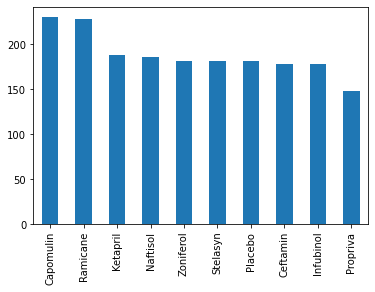

In [118]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_taken = combined_no_dup["Drug Regimen"].value_counts()
measurements_taken.plot.bar()


([<matplotlib.patches.Wedge at 0x2295700d400>,
 [Text(2.5493728737528576, 1.031114906580783, 'Capomulin'),
  Text(1.1241204844450043, 2.509751608516494, 'Ramicane'),
  Text(-0.7442495365816632, 2.6473746669668765, 'Ketapril'),
  Text(-2.1524902601054086, 1.711515609087849, 'Naftisol'),
  Text(-2.7455626080815136, 0.1561600624508023, 'Zoniferol'),
  Text(-2.3447604654267113, -1.4368710310156276, 'Stelasyn'),
  Text(-1.1115245887896916, -2.5153554596748164, 'Placebo'),
  Text(0.5026537760325527, -2.7036714263090875, 'Ceftamin'),
  Text(1.9315025382425604, -1.9574978786099737, 'Infubinol'),
  Text(2.666325071348696, -0.6732091902947935, 'Propriva')],
 [Text(1.3905670220470132, 0.5624263126804271, '12.23%  (230)'),
  Text(0.6131566278790933, 1.3689554228271785, '12.13%  (228)'),
  Text(-0.40595429268090716, 1.4440225456182962, '10.00%  (188)'),
  Text(-1.1740855964211319, 0.9335539685933723, '9.89%  (186)'),
  Text(-1.4975796044080982, 0.0851782158822558, '9.68%  (182)'),
  Text(-1.2789602

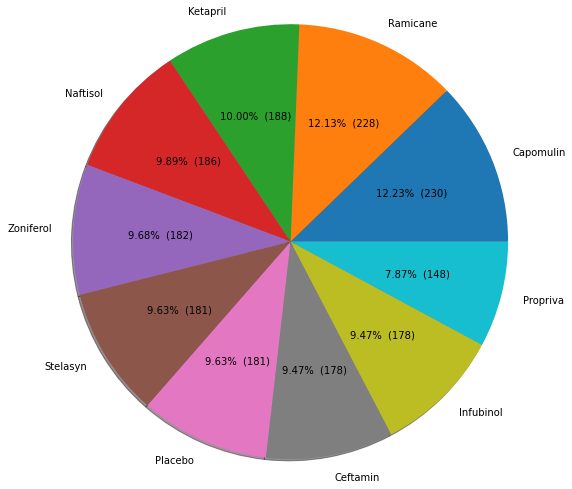

In [119]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
labels = measurements_taken.index.tolist()
measurements = measurements_taken.tolist()
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.pie(measurements,labels=labels, autopct=make_autopct(measurements), shadow=True, radius= 2.5)

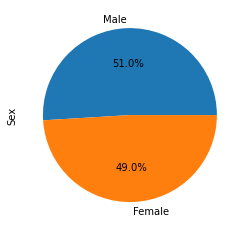

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = combined_no_dup["Sex"].value_counts()

mice_sex.plot(kind='pie',autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x229599ec438>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

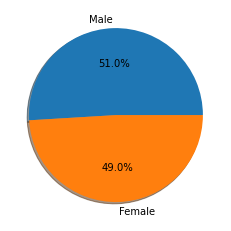

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_labels = mice_sex.index.tolist()
sex_count = mice_sex.tolist()
plt.pie(sex_count, labels = sex_labels, autopct="%1.1f%%", shadow=True )


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
